# Example 2: Channels and Demodulation

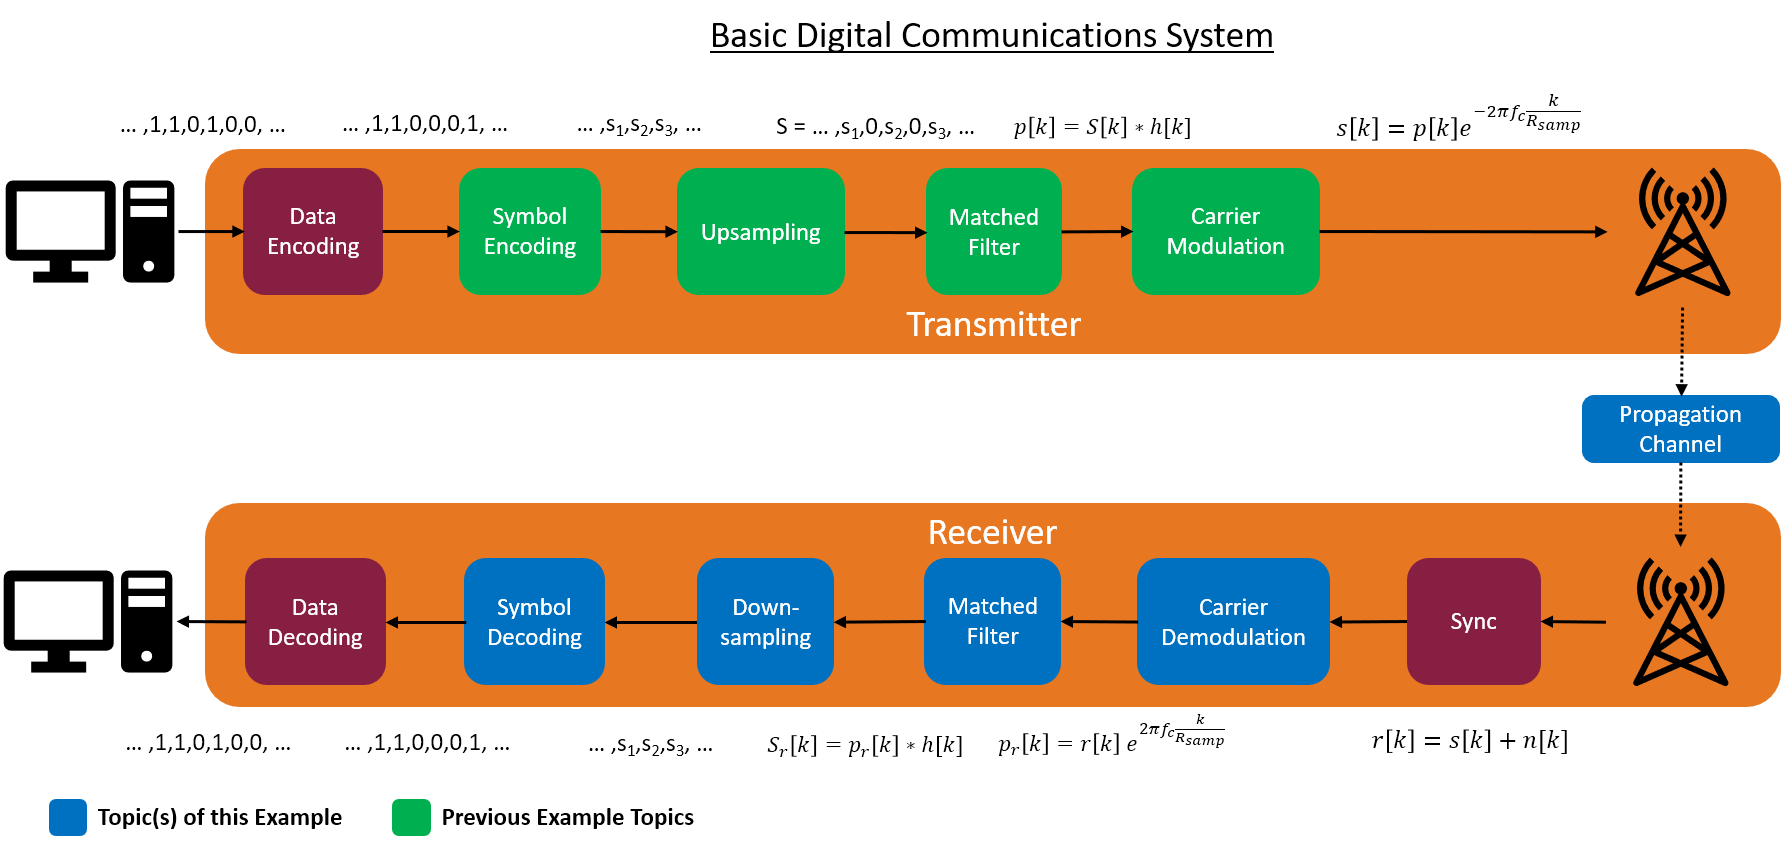

In this notebook example, we will briefly introduce the concepts of transmitting a digital commmunications signal, propagation of that signal through a simple channel model, and demodulating the received signal. It is strongly encouraged to review Example 1 before going through this example to learn about creating a digital communications signal. More specifically, this example will introduce Additive White Gaussian Noise (AWGN) channels and the process of recovering the transmited symbols through the demoulation process.

Note: For this example, the pulse shaping function is assumed to be a [root-raised cosine](https://en.wikipedia.org/wiki/Root-raised-cosine_filter).

In [1]:
# Setting Imports and Pathing for Example
import sys
sys.path.append("../")

import numpy as np
import src.modems as modems
import src.channels as channels
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.special import erfc

# Setting Plotting Parameters for Example
span          = 10
total_symbs_1 = 10
total_symbs_2 = 1000000

fs   = 1
nfft = 256

fontsize = 18
figsize  = (20, 10)

## Additive White Gaussian Noise (AWGN) Channels

Digital communication systems can be though of as consisting of three primary components namely the transmitter, the propagation channel, and the receiver. Exercises 0 and 1 concerned the development of a simple LDAPM-based transmitter. In this example, we begin by looking at the simplist of propagation channels, an Additive White Gaussian Noise (AWGN) channel. 

From [Wikipedia](https://en.wikipedia.org/wiki/Additive_white_Gaussian_noise):
>Additive white Gaussian noise (AWGN) is a basic noise model used in information theory to mimic the effect of many random processes that occur in nature. The modifiers denote specific characteristics:
**Additive** because it is added to any noise that might be intrinsic to the information system.
**White** refers to the idea that it has uniform power across the frequency band for the information system. It is an analogy to the color white which has uniform emissions at all frequencies in the visible spectrum.
**Gaussian** because it has a normal distribution in the time domain with an average time domain value of zero. Wideband noise comes from many natural noise sources, such as the thermal vibrations of atoms in conductors (referred to as thermal noise or Johnson–Nyquist noise), shot noise, black-body radiation from the earth and other warm objects, and from celestial sources such as the Sun. The central limit theorem of probability theory indicates that the summation of many random processes will tend to have distribution called Gaussian or Normal. 

A measure of the quality of the received signal after propagating through an AWGN channel is represented by the Signal-to-Noise Ratio (SNR) of the received signal:

$SNR_{dB} = \frac{P_{signal}}{P_{noise}}$

The below code block illustrates the creation of an LDAPM modulated signal and propagation through an AWGN channel. The prestine transmitted signal and the AWGN corrupted signal are then plotted for comparison.

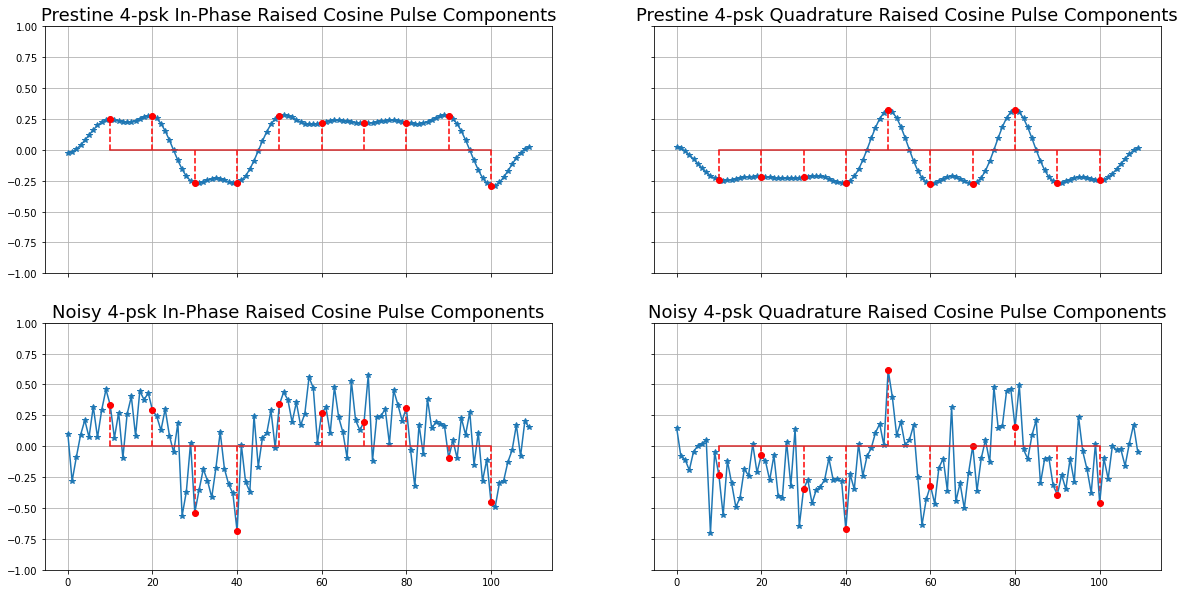

In [2]:
# Setting LDAPM Type and Order (User Adjustable)
mod_type = 'psk'      # Options: 'psk', 'qam'
mod_order = 4         # Options: Any positive power of 2 (must be an even power of 2 for 'qam' mod_type)

# Setting Pulse Shaping Parameters (User Adjustable)
samps_per_symb = 10   # Options: Any positive integer > 2
beta = 0.75           # Options: Any float in the range (0,1]

# Setting Channel Parameters (User Adjustable)
snr_db = 10           # Options: Any floating point number.

# Instantiating the LDAPM Modem and Generating Random LDAPM Symbols
ldapm_modem = modems.ldapm(sps=samps_per_symb, mod_type=mod_type, mod_order=mod_order, filt_type='rrc', beta=beta, span=span, trim=1)
rand_symbols = ldapm_modem.gen_symbs(total_symbs_1)

# Pulse Shaping the Random LDAPM Symbols with a Raised Cosine Pulse Shape
ldapm_rand_raised_cosine_pulses = ldapm_modem.get_samps(rand_symbols)

# Corrupting the Pulse Shaped Symbols with Additive White Gaussian Noise
noisy_pulses = channels.awgn(ldapm_rand_raised_cosine_pulses, snr_db, 1.0)

# Figure Initialization
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=figsize)
plt.ylim([-1.0, 1.0])
axs[0, 0].grid(); axs[0, 1].grid(); axs[1, 0].grid(); axs[1, 1].grid()

# Plotting a Subset of the Generated Prestine Raised Cosine Pulses
axs[0, 0].plot(ldapm_rand_raised_cosine_pulses.real, '-*')
axs[0, 1].plot(ldapm_rand_raised_cosine_pulses.imag, '-*')
axs[0, 0].stem(np.arange(samps_per_symb,(total_symbs_1+1)*samps_per_symb,samps_per_symb), ldapm_rand_raised_cosine_pulses[samps_per_symb:(total_symbs_1+1)*samps_per_symb:samps_per_symb].real, linefmt='--r', markerfmt='ro')
axs[0, 1].stem(np.arange(samps_per_symb,(total_symbs_1+1)*samps_per_symb,samps_per_symb), ldapm_rand_raised_cosine_pulses[samps_per_symb:(total_symbs_1+1)*samps_per_symb:samps_per_symb].imag, linefmt='--r', markerfmt='ro')
axs[0, 0].set_title('Prestine ' + str(mod_order) + '-' + mod_type + ' In-Phase Raised Cosine Pulse Components', fontsize=fontsize)
axs[0, 1].set_title('Prestine ' + str(mod_order) + '-' + mod_type + ' Quadrature Raised Cosine Pulse Components', fontsize=fontsize)

# Plotting a Subset of the Generated Noisy Raised Cosine Pulses
axs[1, 0].plot(noisy_pulses.real, '-*')
axs[1, 0].stem(np.arange(samps_per_symb,(total_symbs_1+1)*samps_per_symb,samps_per_symb), noisy_pulses[samps_per_symb:(total_symbs_1+1)*samps_per_symb:samps_per_symb].real, linefmt='--r', markerfmt='ro')
axs[1, 1].plot(noisy_pulses.imag, '-*')
axs[1, 1].stem(np.arange(samps_per_symb,(total_symbs_1+1)*samps_per_symb,samps_per_symb), noisy_pulses[samps_per_symb:(total_symbs_1+1)*samps_per_symb:samps_per_symb].imag, linefmt='--r', markerfmt='ro')
axs[1, 0].set_title('Noisy ' + str(mod_order) + '-' + mod_type + ' In-Phase Raised Cosine Pulse Components', fontsize=fontsize)
axs[1, 1].set_title('Noisy ' + str(mod_order) + '-' + mod_type + ' Quadrature Raised Cosine Pulse Components', fontsize=fontsize)

plt.show()

*Exercise: Try changing the modulation, pulse shaping, and channel parameters in the code block above to see their impact. In particular, note that lower SNRs lead to more noisy signals.*

Let us now look at the Fourier transform of the prestine transmitted signal and the AWGN corrupted signal.

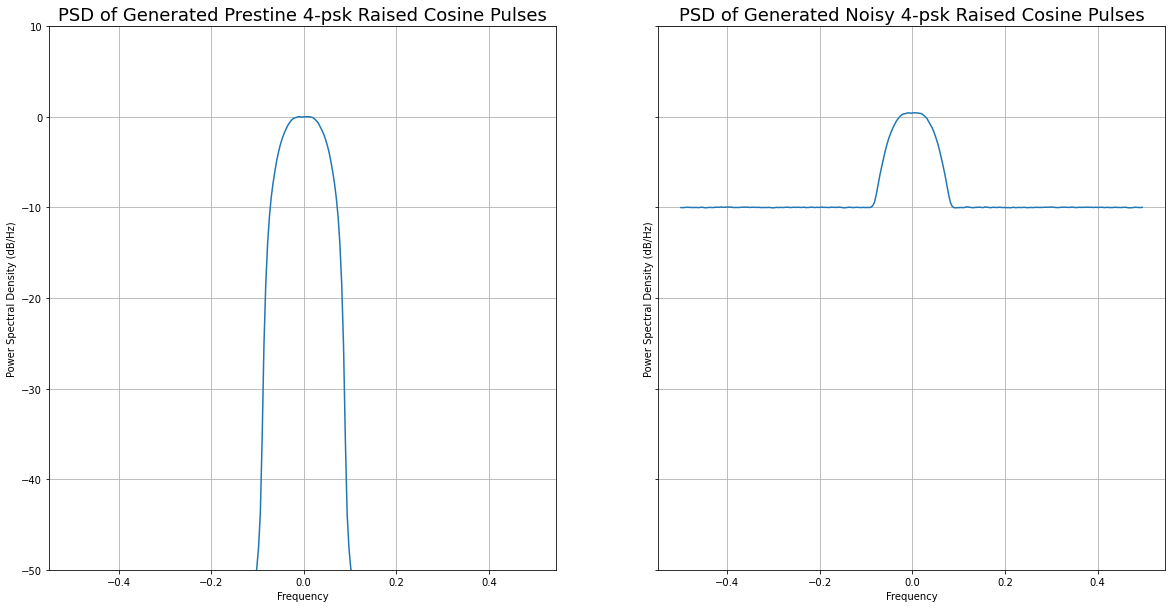

In [3]:
# Setting LDAPM Type and Order (User Adjustable)
mod_type = 'psk'      # Options: 'psk', 'qam'
mod_order = 4         # Options: Any positive power of 2 (must be an even power of 2 for 'qam' mod_type)

# Setting Pulse Shaping Parameters (User Adjustable)
samps_per_symb = 10   # Options: Any positive integer > 2
beta = 0.75           # Options: Any float in the range (0,1]

# Setting Channel Parameters (User Adjustable)
snr_db = 10           # Options: Any floating point number.

# Instantiating the LDAPM Modem and Generating Random LDAPM Symbols
ldapm_modem = modems.ldapm(sps=samps_per_symb, mod_type=mod_type, mod_order=mod_order, filt_type='rrc', beta=beta, span=span, trim=1)
rand_symbols = ldapm_modem.gen_symbs(total_symbs_2)

# Pulse Shaping the Random LDAPM Symbols with a Raised Cosine Pulse Shape
ldapm_rand_raised_cosine_pulses = ldapm_modem.get_samps(rand_symbols)

# Corrupting the Pulse Shaped Symbols with Additive White Gaussian Noise
noisy_pulses = channels.awgn(ldapm_rand_raised_cosine_pulses, snr_db, 1.0)

# Figure Initialization
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=figsize)
axs[0].grid()
axs[1].grid()
axs[0].set_title('PSD of Generated Prestine ' + str(mod_order) + '-' + mod_type + ' Raised Cosine Pulses', fontsize=fontsize)
axs[1].set_title('PSD of Generated Noisy ' + str(mod_order) + '-' + mod_type + ' Raised Cosine Pulses', fontsize=fontsize)

# Plotting the Fourier Transform of the Raised Cosine Pulse Shaped Modulated Symbols
axs[0].psd(ldapm_rand_raised_cosine_pulses, NFFT=nfft, Fs=fs, label='Square PSD')
axs[1].psd(noisy_pulses, NFFT=nfft, Fs=fs, label='Square PSD')
plt.ylim([-50, 10])
plt.yticks(np.arange(-50, 20, 10))
plt.show()

Note that the noisy signal has a so-called "noise floor" due to the AWGN channel. In fact, for higher SNRs the SNR can be approximately observed directly from this plot by looking at the difference between the peak of the signal and the noise floor. 

*Exercise: Try changing the modulation, pulse shaping, and channel parameters in the code block above to see their impact on the Fourier transform. Again, note the position of the noise floor in relation to the peak of the signal's bandwidth*

## Signal Demodulation

After propagation through the AWGN channel, the final step is to demodulate the received signal. [Demodulation](https://en.wikipedia.org/wiki/Demodulation), as the name implies, is the inverse of the modulation process. Demodulation is performed on the received descrete digital communications signal $r[k]$, which can be defined as

$r[k] = s[k] + n[k]$,

where $s[k]$ was previously defined in Example 1 and $n[k]$ are the noise samples from the AWGN channel, as just discussed.

Given $r[k]$, the upsampled received symbols $S_{r}[k]$ can be found through the following process:

$S_{r}[k] = r[k] * h[k]$

where $h[k]$, as previously defined in Example 1, is the pulse shaping function and * denotes the convolution operation. This process is known as a [matched filtering](https://en.wikipedia.org/wiki/Matched_filter) and is why a root-raised cosine pulse shaping function is used in this example as opposed to a raised cosine pulse shape. This is due to the [Nyquist ISI criterion](https://en.wikipedia.org/wiki/Nyquist_ISI_criterion).

Finally, the received symbols $S_{r}$ are found by downsampling $S_{r}[k]$ by the samples per symbol. **It should be noted that for non-square pulse shaping functions, the downsampling operation is performed at the optimal sampling points of the pulse shaping function $h[k]$, details of which are beyond the scope of this example.**

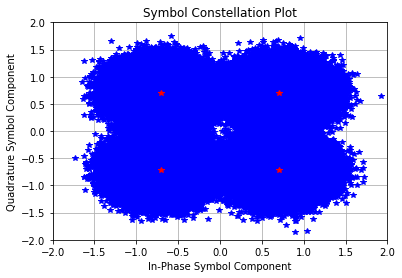

In [4]:
# Setting LDAPM Type and Order (User Adjustable)
mod_type = 'psk'      # Options: 'psk', 'qam'
mod_order = 4         # Options: Any positive power of 2 (must be an even power of 2 for 'qam' mod_type)

# Setting Pulse Shaping Parameters (User Adjustable)
samps_per_symb = 10   # Options: Any positive integer > 2
beta = 0.75           # Options: Any float in the range (0,1]

# Setting Channel Parameters (User Adjustable)
snr_db = 10           # Options: Any floating point number.

# Instantiating the LDAPM Modem and Generating Random LDAPM Symbols
ldapm_modem = modems.ldapm(sps=samps_per_symb, mod_type=mod_type, mod_order=mod_order, filt_type='rrc', beta=beta, span=span, trim=1)
rand_symbols = ldapm_modem.gen_symbs(total_symbs_2)

# Pulse Shaping the Random LDAPM Symbols with a Raised Cosine Pulse Shape
ldapm_rand_raised_cosine_pulses = ldapm_modem.get_samps(rand_symbols)

# Corrupting the Pulse Shaped Symbols with Additive White Gaussian Noise
noisy_pulses = channels.awgn(ldapm_rand_raised_cosine_pulses, snr_db, 1.0)

# Demodulating the Corrupted Pulse Shaped Symbols
rx_symbs = ldapm_modem.get_symbs(noisy_pulses)

# Figure Initialization
plt.title('Symbol Constellation Plot')
plt.xlabel('In-Phase Symbol Component')
plt.ylabel('Quadrature Symbol Component')
plt.grid()
plt.xlim([-2.0, 2.0]); plt.ylim([-2.0, 2.0])

# Transmitted Symbol and Demodulated Symbol Plotting
plt.plot(rx_symbs.real,rx_symbs.imag,'b*')
plt.plot(ldapm_modem.symb_table.real, ldapm_modem.symb_table.imag,'r*')

plt.show()

*Exerise: Try changing the modulation, pulse shaping, and channel parameters in the code block above to see their impact on the demodulated symbols. In particular, note that visually it becomes harder to tell which demodulated symbol belongs to which symbol in the modulation's symbol set as the SNR decreases or the order of the modulation type changes. This is the fundamental trade-off between the chosen modulation's data rate and its ability to handle noise.*

## Symbol Error Rate (SER)

Finally, once we have extracted the demodulated symbols we must determine which symbol from the chosen modulation's symbol set it came from in order to extract the intended transmitted bits. For the assumption of an AWGN channel, this can be done by simply determining the modulation's symbol that is closest to the demodulated symbol. 

As just observed from the code block above, as the SNR decreases, the distributed of the demodulated symbols expand further and further from the true symbols of the modulation. This will cause the calculation of the closest symbol to be in error, leading to errors in receiving the intended transmitted bits. 

In the below, the measured symbol error rate from simulation is compared to the theoretical (mathematically) derived symbol error rate for the chosen LDAPM type and order.

In [5]:
# Setting LDAPM Type and Order (User Adjustable)
mod_type = 'psk'      # Options: 'psk', 'qam'
mod_order = 4         # Options: Any positive power of 2 (must be an even power of 2 for 'qam' mod_type)

# Setting Pulse Shaping Parameters (User Adjustable)
samps_per_symb = 10   # Options: Any positive integer > 2
beta = 0.75           # Options: Any float in the range (0,1]

# Setting Channel Parameters (User Adjustable)
snr_db = 10           # Options: Any floating point number.

# Instantiating the LDAPM Modem and Generating Random LDAPM Symbols
ldapm_modem = modems.ldapm(sps=samps_per_symb, mod_type=mod_type, mod_order=mod_order, filt_type='rrc', beta=beta, span=span, trim=1)
rand_symbols = ldapm_modem.gen_symbs(total_symbs_2)

# Pulse Shaping the Random LDAPM Symbols with a Raised Cosine Pulse Shape
ldapm_rand_raised_cosine_pulses = ldapm_modem.get_samps(rand_symbols)

# Corrupting the Pulse Shaped Symbols with Additive White Gaussian Noise
noisy_pulses = channels.awgn(ldapm_rand_raised_cosine_pulses, snr_db, 1.0)

# Demodulating the Corrupted Pulse Shaped Symbols
rx_symbs = ldapm_modem.get_symbs(noisy_pulses)

# Measuring the Symbol Error Rate from the Demodulated Symbols
symb_errors = 0
for y in range(0,len(rx_symbs)):
    idx = np.abs(rx_symbs[y]-ldapm_modem.symb_table).argmin()
    symb_errors = symb_errors + (1-np.equal(rand_symbols[y], ldapm_modem.symb_table[idx]))
symb_error_rate = symb_errors / len(rx_symbs)
print('The simulated symbol error rate for ' + str(mod_order) + '-' + mod_type + ' is: ' + str(symb_error_rate))

# Calculating the Theoretical Symbol Error Rate for the chosen LDAPM type and order.
if mod_type == 'psk':
    if mod_order == 2:
        theory = norm.sf((2.0*10.0**(snr_db/10.0))**(1.0/2.0))
    elif mod_order == 4:
        theory = 1-(1-norm.sf((10.0**(snr_db/10.0))**(1.0/2.0)))**(2.0)
    else:
        theory = 2.0*norm.sf((2.0*10.0**(snr_db/10.0))**(1.0/2.0)*np.sin(np.pi/mod_order))
elif mod_type == 'qam':
    k = ((1.0)/(((2.0)/(3.0))*(mod_order-1.0)))**(1.0/2.0)
    theory = 2.0*(1.0-(1.0)/(mod_order**(1.0/2.0)))*erfc(k*(10.0**(snr_db/10.0))**(1.0/2.0))-(1.0-(2.0)/(mod_order**(1.0/2.0))+(1.0)/(mod_order))*erfc(k*(10.0**(snr_db/10.0))**(1.0/2.0))**2.0
print('The theoretical symbol error rate for ' + str(mod_order) + '-' + mod_type + ' is: ' + str(theory))

The simulated symbol error rate for 4-psk is: 0.001485
The theoretical symbol error rate for 4-psk is: 0.0015647896369451741


*Exerise: Try changing the modulation, pulse shaping, and channel parameters in the code block above to see their impact on the symbol error rate. In particular, note that the symbol error rate increases as the SNR decreases or the order of the modulation type changes. This is again the fundamental trade-off between the chosen modulation's data rate and its ability to handle noise.*